In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib as mpl
mpl.rcParams.update({"text.usetex":True})

In [93]:
df = pd.read_excel('HPF.xlsx')
print(df)

        f  Vin  Vout_c       Gain     power    Vout
0     100    2   0.627  -4.053000 -0.202650   0.627
1     200    2   1.248   1.925900  0.096295   1.248
2     300    2   1.855   5.368000  0.268400   1.855
3     400    2   2.448   7.777000  0.388850   2.448
4     500    2   2.998   9.535500  0.476775   2.998
5     600    2   3.529  10.953000  0.547650   3.529
6     700    2   4.026  12.097600  0.604880   4.026
7     800    2   4.495  13.054100  0.652705   4.445
8     900    2   4.926  13.849600  0.692480   4.897
9     950    2   5.334  14.541300  0.727065   5.240
10   1000    2   6.017  15.587400  0.779370   6.004
11   1200    2   6.609  16.402440  0.820122   6.484
12   1400    2   6.856  16.721690  0.836085   6.806
13   1500    2   6.864  16.732000  0.836600   6.864
14   1590    2   7.079  17.000000  0.850000   7.079
15   1650    2   7.198  17.143800  0.857190   7.198
16   1700    2   7.305  17.272400  0.863620   7.305
17   1800    2   7.498  17.498690  0.874934   7.498
18   1900   

In [94]:
Vi = np.array(df["Vin"])
Vo = np.array(df["Vout"])
fr = np.array(df["f"])
gain = 20*np.log10(Vo/Vi)
print(gain)
# dff = pd.DataFrame(Vo)
# dff.to_excel(excel_writer="vout.xlsx")

[-10.0752491   -4.09630821  -0.65372163   1.75562836   3.51603266
   4.93243325   6.0768755    6.93683539   7.77800217   8.36602583
   9.54821376  10.21626021  10.63723898  10.71094558  10.97883833
  11.12363693  11.25180449  11.47830881  11.67304217  11.84797692
  12.59532535  13.16499909  13.33971437  13.4659488   13.55761163
  13.92712777  13.95330325  13.94458686  13.94458686  13.96201091
  13.97940009  13.97940009  13.97940009  13.97940009]


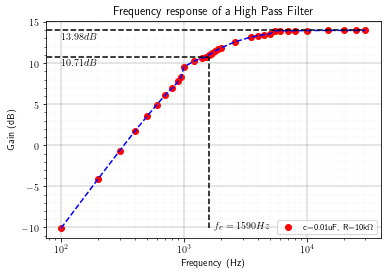

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="0.4")
ax.grid(which = "minor",linestyle = "--", linewidth="0.1")
ax.minorticks_on()
ax.scatter(fr,gain,color="red",label="c=0.01uF, R=10k$\Omega$")
ax.semilogx(fr,gain,ls="--",color="Blue")
ax.plot([1590, 1590],[-10.076,10.7109],ls="--",color="black")
ax.plot([0, 1590],[10.7109,10.7109],ls="--",color="black")
ax.plot([0, 30000],[13.97940009,13.97940009],ls="--",color="black")
ax.annotate(r"$f_{c}=1590 Hz$",xy=(1590,-10.076),xytext=(1750,-10.076))
ax.annotate(r"$13.98 dB$",xy=(100,13.97940009),xytext=(100,12.97940009))
ax.annotate(r"$10.71 dB$",xy=(100,10.7109),xytext=(100,9.7109))
plt.title("Frequency response of a High Pass Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.legend(loc='best',prop={'size':8})
plt.savefig('HPF.pdf')
plt.show()